In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform( -3, 3 ,size = 100)
X = x.reshape( -1, 1)
y = 0.5* x**2 + x + 2 + np.random.normal(0,1,size = 100)

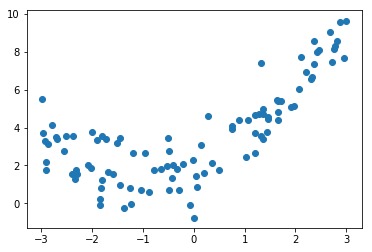

In [2]:
plt.scatter(x,y)

### 学习曲线

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10)

In [7]:
X_train.shape

(75, 1)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
train_score = []
test_score = []

for i in range(1,76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i],y_train[:i]) #取前i个元素
    y_train_predict = lin_reg.predict(X_train[:i])
    
    y_test_predict = lin_reg.predict(X_test)
    
    train_score.append(mean_squared_error(y_train[:i],y_train_predict))
    test_score.append(mean_squared_error(y_test,y_test_predict))
    
    
    
    
    

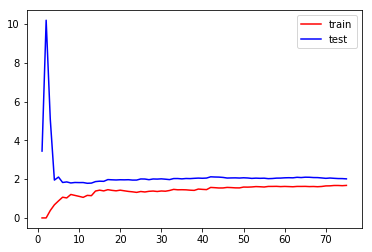

In [13]:
#欠拟合
plt.plot([i for i in range(1,76)],np.sqrt(train_score),color='r',label='train')
plt.plot([i for i in range(1,76)],np.sqrt(test_score),color='b',label='test')
plt.legend()

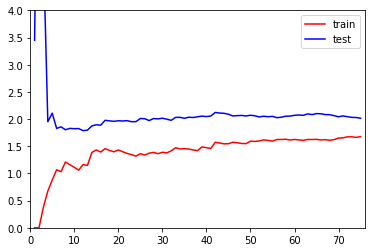

In [18]:
def plot_learing_curve(algo,X_train,X_test,y_train,y_test):
    train_score = []
    test_score = []

    for i in range(1,len(X_train)+1):
        
        algo.fit(X_train[:i],y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
    
        y_test_predict = algo.predict(X_test)
        
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))
        test_score.append(mean_squared_error(y_test,y_test_predict))
    plt.plot([i for i in range(1,76)],np.sqrt(train_score),color='r',label='train')
    plt.plot([i for i in range(1,76)],np.sqrt(test_score),color='b',label='test')
    plt.axis([0,len(X_train)+1,0,4])
    plt.legend()
plot_learing_curve(LinearRegression(),X_train,X_test,y_train,y_test)

In [ ]:
plot_learing_curve(LinearRegression(),X_train,X_test,y_train,y_test)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import  StandardScaler
def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

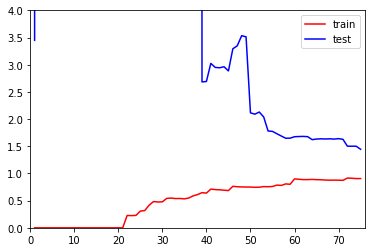

In [30]:
#过拟合
poly20 = PolynomialRegression(degree=20)
plot_learing_curve(poly20,X_train,X_test,y_train,y_test)